Import and deps

In [2]:
import subprocess
import pybedtools

Download GRCh38 reference genome

In [2]:
subprocess.run(['wget https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/chromFa.tar.gz -O ../data37/37.genome.fasta.tar.gz'], shell=True)

--2023-06-29 16:17:09--  https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/chromFa.tar.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948736151 (905M) [application/x-gzip]
Saving to: ‘../data37/37.genome.fasta.tar.gz’

     0K .......... .......... .......... .......... ..........  0% 41.3K 6h13m
    50K .......... .......... .......... .......... ..........  0% 72.1K 4h54m
   100K .......... .......... .......... .......... ..........  0%  119K 3h59m
   150K .......... .......... .......... .......... ..........  0% 40.5K 4h34m
   200K .......... .......... .......... .......... ..........  0% 46.9K 4h45m
   250K .......... .......... .......... .......... ..........  0% 80.1K 4h30m
   300K .......... .......... .......... .......... ..........  0% 84.5K 4h17m
   350K .......... .......... ...

CompletedProcess(args=['wget https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/chromFa.tar.gz -O ../data37/37.genome.fasta.tar.gz'], returncode=0)

In [3]:
subprocess.run(['gunzip ../data37/37.genome.fasta.tar.gz'], shell=True)

CompletedProcess(args=['gunzip ../data37/37.genome.fasta.tar.gz'], returncode=0)

In [21]:
subprocess.run(['wget https://ftp.ensembl.org/pub/release-109/variation/vcf/homo_sapiens/homo_sapiens_structural_variations.vcf.gz -O ../data37/homo_sapiens_structural_variations.vcf'], shell=True)

--2023-06-29 10:21:27--  https://ftp.ensembl.org/pub/release-109/variation/vcf/homo_sapiens/homo_sapiens_structural_variations.vcf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267618924 (255M) [application/x-gzip]
Saving to: ‘homo_sapiens_structural_variations.vcf.gz’

     0K .......... .......... .......... .......... ..........  0%  393K 11m5s
    50K .......... .......... .......... .......... ..........  0%  752K 8m26s
   100K .......... .......... .......... .......... ..........  0% 14.0M 5m43s
   150K .......... .......... .......... .......... ..........  0%  759K 5m44s
   200K .......... .......... .......... .......... ..........  0%  700K 5m49s
   250K .......... .......... .......... .......... ..........  0%  725K 5m51s
   300K .......... .......... .......... .......... ..........  0%  657K 5m58s
   350K .......... .

CompletedProcess(args=['wget https://ftp.ensembl.org/pub/release-109/variation/vcf/homo_sapiens/homo_sapiens_structural_variations.vcf.gz'], returncode=0)

In [23]:
subprocess.run(['gunzip ../data37/homo_sapiens_structural_variations.vcf.gz'], shell=True)

CompletedProcess(args=['gunzip ../data/homo_sapiens_structural_variations.vcf.gz'], returncode=0)

In [3]:
reference_genome = "../data37/hg19.fasta"
targeted_reference_genome = "../data37/targeted.fasta"
output_dict = "../data37/hg19.dict"
input_bam = "../data37/input_reads.bam"
targeted_input_bam = "../data37/targeted_input_reads.bam"
targeted_input_sam = "../data37/targeted_input_reads.sam"
output_sam = "../data37/aligned_reads.sam"
sorted_bam = "../data37/sorted_reads.bam"
filtered_bam = "../data37/filtered_reads.bam"
output_vcf = "../data37/output.vcf"
dbsnp_vcf = "../data37/homo_sapiens_structural_variations.vcf"

In [10]:
subprocess.run([f"samtools faidx {reference_genome}"], shell=True)

CompletedProcess(args=['samtools faidx ../data37/hg19.fasta'], returncode=0)

In [17]:
import subprocess
subprocess.run([f"samtools index {input_bam}"], shell=True)
# subprocess.run([f"bedtools intersect -a {input_bam} -b ../data37/BRCA1_BRCA2_regions.bed > {targeted_input_bam}"], shell=True)

CompletedProcess(args=['samtools index ../data37/input_reads.bam'], returncode=0)

In [13]:
import pysam
bam_file = pysam.AlignmentFile(input_bam, 'rb')
bed_file = open('../data37/BRCA1_BRCA2_regions.bed', 'r')
output_bam = pysam.AlignmentFile(targeted_input_bam, 'wb', header=bam_file.header)
regions = bed_file.readlines()
for region in regions:
    chrom, start, end = region.strip().split('\t')
    for alignment in bam_file.fetch(chrom, int(start), int(end)):
        output_bam.write(alignment)
        print(alignment)
bam_file.close()
output_bam.close()

HK9DR:01000:13801	16	#12	32333053	0	1S41M	*	0	0	GCAGGCGCCTGTAATCCCAGCTACTCGGGAGGCTGAGGCAGG	array('B', [9, 9, 11, 7, 10, 10, 20, 15, 25, 25, 28, 27, 23, 25, 25, 23, 32, 28, 27, 27, 25, 25, 24, 24, 24, 26, 19, 26, 26, 26, 22, 27, 27, 27, 25, 25, 22, 14, 14, 14, 20, 24])	[('ZP', array('f', [0.005853727459907532, 0.004401202313601971, 0.0008607461350038648])), ('ZE', 'CCTACACGACGCTCTTCCGATCTCAATTCT'), ('ZG', 268), ('ZB', 30), ('ZC', array('i', [268, 268, 2, 0])), ('ZA', 118), ('ZM', array('h', [254, -14, 272, -22, 8, 276, -32, 268, 228, -12, -34, 218, 272, 258, 230, 32, 22, 22, 494, 502, 12, 230, 462, 16, 242, 234, -26, 274, 32, 14, 6, -26, 286, -22, 494, 4, 216, 266, 266, 10, 16, 12, 24, -10, 270, 24, 260, 12, 22, 8, 256, 238, 28, 220, 118, -20, 42, 8, -12, 2, 274, 0, -16, 26, 264, 4, 240, 30, 484, -18, 498, 230, 12, 10, -10, -16, 234, -14, 10, 30, 270, 244, 0, 16, 276, 264, 6, 488, 460, -26, -60, 2, 276, 0, -30, 0, 270, -10, 424, 24, 224, 32, 58, 146, 68, 452, 186, -14, 70, 28, 310, 236,

In [14]:
import pysam
bam_file = pysam.AlignmentFile(targeted_input_bam, 'rb')
sam_file = pysam.AlignmentFile(targeted_input_sam, 'wh', header=bam_file.header)
for alignment in bam_file:
    sam_file.write(alignment)
bam_file.close()
sam_file.close()


[E::idx_find_and_load] Could not retrieve index file for '../data/targeted_input_reads.bam'


In [22]:
# import shlex
# num_threads = 4
# command = f"bwa mem -t {num_threads} -R '@RG\\tID:sampleID\\tSM:sampleID' {targeted_reference_genome} {targeted_input_bam}"
# args = shlex.split(command)
# with open(output_bam, "w") as output_file:
#     subprocess.call(args, stdout=output_file)

subprocess.call([f"bwa mem -t 4 -R '@RG\\tID:sampleID\\tSM:sampleID' {targeted_reference_genome} {targeted_input_bam} > {output_sam}"], shell=True)

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 411 sequences (2328 bp)...
[M::mem_process_seqs] Processed 411 reads in 0.001 CPU sec, 0.001 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -t 4 -R @RG\tID:sampleID\tSM:sampleID ../data/targeted.fasta ../data/targeted_input_reads.bam
[main] Real time: 0.026 sec; CPU: 0.031 sec


0

In [23]:
# subprocess.call([f"samtools quickcheck {output_sam}"], shell=True)
# subprocess.call(["samtools", "view", "-bS", output_sam, "-o", sorted_bam])
subprocess.call([f"samtools view -bS {output_sam} > {sorted_bam}"], shell=True)
subprocess.call([f"samtools sort {sorted_bam} -o {sorted_bam}"], shell=True)

[W::sam_read1_sam] Parse error at line 415
samtools view: error reading file "../data/aligned_reads.sam"


0

In [27]:
subprocess.call([f"samtools index {sorted_bam}"], shell=True)

0

In [14]:
subprocess.call([f"samtools view -b {sorted_bam} chr17:43044295-43125482 > {filtered_bam}"], shell=True)
subprocess.run([f"samtools index {filtered_bam}"], shell=True)

CompletedProcess(args=['samtools index ../data/filtered_reads.bam'], returncode=0)

In [18]:
subprocess.call([f"gatk CreateSequenceDictionary -R {reference_genome} -O {output_dict}"], shell=True)

Using GATK jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar CreateSequenceDictionary -R ../data37/hg19.fasta -O ../data37/hg19.dict
17:10:26.420 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
[Thu Jun 29 17:10:26 EEST 2023] CreateSequenceDictionary --OUTPUT ../data37/hg19.dict --REFERENCE ../data37/hg19.fasta --TRUNCATE_NAMES_AT_WHITESPACE true --NUM_SEQUENCES 2147483647 --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 500000 --CREATE_IND

3

In [3]:
subprocess.call([f"gatk HaplotypeCaller -R {reference_genome} -I {input_bam} -O {output_vcf}"], shell=True)

Using GATK jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar HaplotypeCaller -R ../data37/hg19.fasta -I ../data37/input_reads.bam -O ../data37/output.vcf
18:42:25.987 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
18:42:26.360 INFO  HaplotypeCaller - ------------------------------------------------------------
18:42:26.365 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.4.0.0
18:42:26.365 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.o

0

In [4]:
subprocess.call([f"gatk BaseRecalibrator -R {reference_genome} -I {input_bam} --known-sites {dbsnp_vcf} -O ../data37/recal_data.table"], shell=True)
subprocess.call([f"gatk ApplyBQSR -R {reference_genome} -I {input_bam} --bqsr-recal-file ../data37/recal_data.table -O ../data37/recalibrated_reads.bam"], shell=True)

Using GATK jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar BaseRecalibrator -R ../data37/hg19.fasta -I ../data37/input_reads.bam --known-sites ../data37/homo_sapiens_structural_variations.vcf -O ../data37/recal_data.table
20:24:26.475 INFO  NativeLibraryLoader - Loading libgkl_compression.dylib from jar:file:/Users/dascal/opt/anaconda3/envs/mamarCancer/share/gatk4-4.4.0.0-0/gatk-package-4.4.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.dylib
20:24:26.923 INFO  BaseRecalibrator - ------------------------------------------------------------
20:24:26.928 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.4.0.0
20:24:26.928 INFO  BaseRecalibrato

2

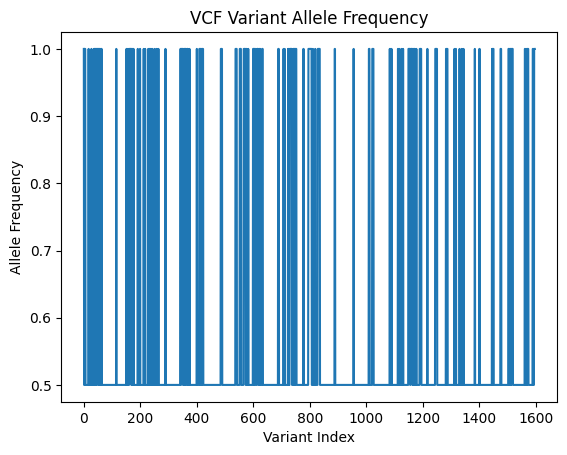

In [10]:
import pysam
import matplotlib.pyplot as plt

vcf_reader = pysam.VariantFile(open(output_vcf, "r"))

# Păstrați informațiile relevante pentru grafic (de exemplu, AF - frecvența alelei alternative)
allele_frequencies = []
for record in vcf_reader:
    allele_frequencies.append(record.info.get("AF")[0])

# Plasați graficul
plt.plot(allele_frequencies)
plt.xlabel("Variant Index")
plt.ylabel("Allele Frequency")
plt.title("VCF Variant Allele Frequency")
plt.show()

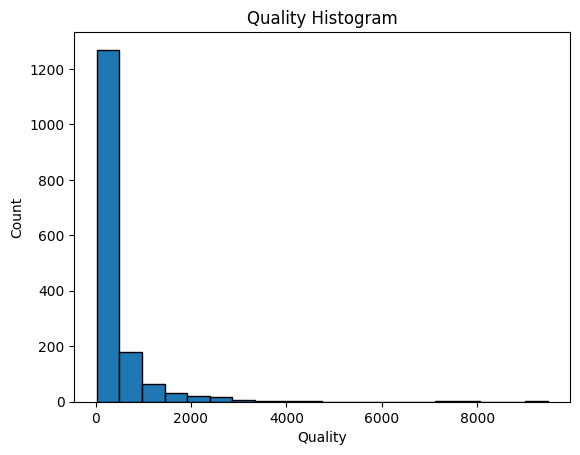

In [12]:
import matplotlib.pyplot as plt

# Lista pentru a stoca calitățile
qualities = []

# Citirea fișierului VCF și extragerea calităților
with open(output_vcf, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            data = line.strip().split('\t')
            quality = float(data[5])
            qualities.append(quality)

# Crearea histogramă a calităților
plt.hist(qualities, bins=20, edgecolor='black')

# Etichetele axelor
plt.xlabel('Quality')
plt.ylabel('Count')

# Titlul diagramei
plt.title('Quality Histogram')

# Afișarea diagramei
plt.show()


1.00
0.500
0.500
1.00
1.00
1.00
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
1.00
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
1.00
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
1.00
0.500
1.00
1.00
1.00
1.00
0.500
1.00
1.00
1.00
0.500
0.500
1.00
1.00
1.00
1.00
1.00
0.500
1.00
1.00
0.500
1.00
0.500
0.500
1.00
0.500
1.00
1.00
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
1.00
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
0.500
1.00
0.500
1.00
0.500
0.500
0.500
1.00
0.500
0.500
0.500
1.00
1.00
1.00
1.00
1.00
1.00
1.00
0.500
1.00
1.00
0.500
0.500


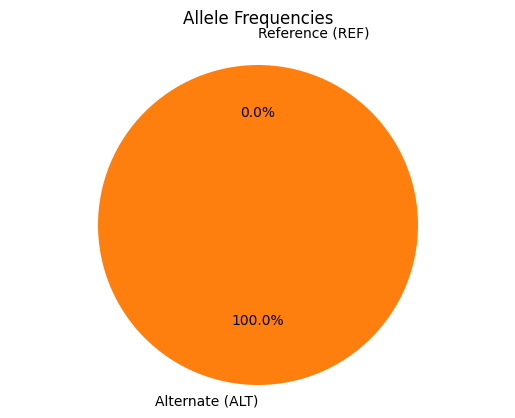

In [22]:
import matplotlib.pyplot as plt

# Dicționar pentru a stoca frecvențele alelelor
allele_frequencies = {}

# Citirea fișierului VCF și extragerea informațiilor despre frecvențele alelelor
with open(output_vcf, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            data = line.strip().split('\t')
            info = data[7].split(';')
            for item in info:
                if item.startswith('AF='):
                    freq = item.split('=')[1]
                    if len(item.split(',')) > 1:
                        continue
                    print(freq)
                    allele_frequency = float(freq)
                    allele_frequencies['ALT'] = allele_frequency
                    allele_frequencies['REF'] = 1 - allele_frequency

# Crearea diagramă de tip "pie"
labels = ['Reference (REF)', 'Alternate (ALT)']
sizes = [allele_frequencies['REF'], allele_frequencies['ALT']]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)  # Pentru a separa puțin secțiunea "Reference"

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Aspectul circular
plt.axis('equal')

# Titlul diagramei
plt.title('Allele Frequencies')

# Afișarea diagramei
plt.show()
